In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df=pd.read_csv("height-weight.csv")

In [23]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


Text(0, 0.5, 'Height')

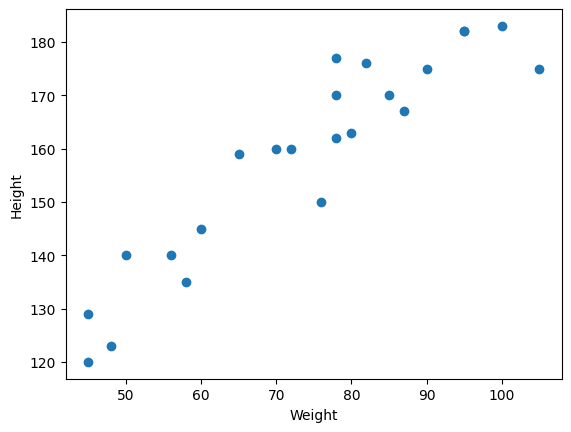

In [24]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [25]:
## Dividing the data into X and y (Independent and Dependent variables)
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [26]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [27]:
X.shape

(23, 1)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
# We use X_trin and y_train to train the model 

## Standardize the dataset Train independent variable

In [29]:
from sklearn.preprocessing import StandardScaler    ## Standardization is  z-score calculation on each dataset
scaler = StandardScaler()

In [30]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [31]:
X_train=scaler.fit_transform(X_train)  # fit_transform: fit is used to calculate the mean and standard deviation, and transform is used to standardize(z-score) the data
X_test=scaler.transform(X_test)  # transform is used to standardize the test data using the mean and standard deviation from the training data

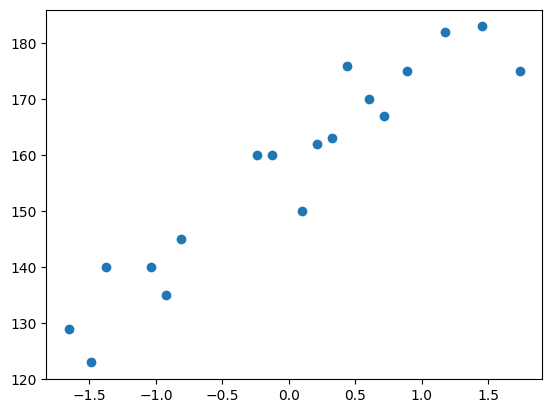

In [32]:
plt.scatter(X_train,y_train)

In [33]:
## Train the Simple LInear Regression Model
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression()

In [35]:
regressor.fit(X_train,y_train)  # fit the model using the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
print("The solpe or coefficient of weight is ",regressor.coef_)  # coefficient of the linear regression model

The solpe or coefficient of weight is  [17.03440872]


In [38]:
print("The intercept of the model is ",regressor.intercept_)  # intercept of the linear regression model

The intercept of the model is  157.5


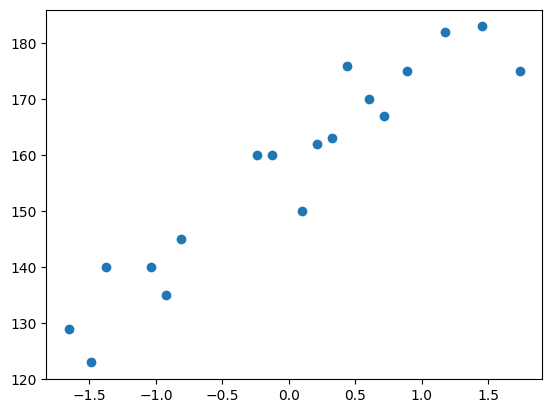

In [39]:
plt.scatter(X_train, y_train)

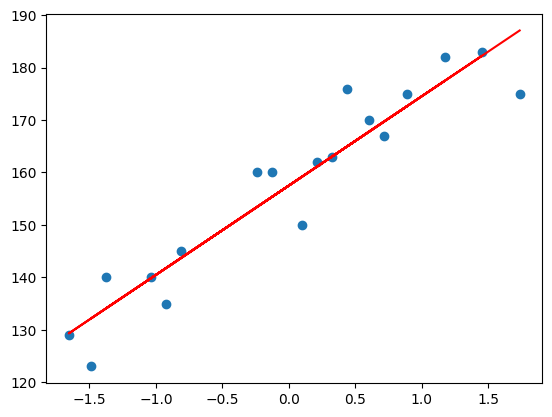

In [41]:
## Draw the best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')  # predict the values using the trained model 

#### Prediciton of train data
1. predicted height output = intercept + coef_(weights)
2. y_pred_tran = 157.5 + 17.034(X_train)

### Prediction of test data
1. predicted height output = intercept + coef_(weights)
2. y_pred_test = 157.5 + 17.034(X_test)

In [42]:
y_pred_test = regressor.predict(X_test)  # predict the values for the test data

In [43]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [44]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

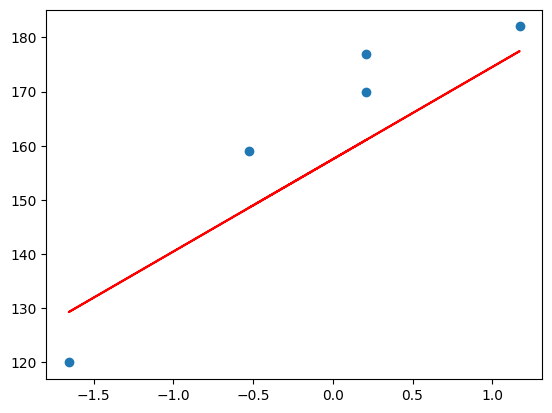

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test,regressor.predict(X_test), 'r')  # plot the predicted values for the test data

## Performance Metrics


## MSE, MAE, RMSE 
## R squared, Adjusted R squared

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
mae=mean_absolute_error(y_test,y_pred_test)  # Mean Absolute Error
mse=mean_squared_error(y_test,y_pred_test)  # Mean Squared Error
rmse=np.sqrt(mse)  # Root Mean Squared Error
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)

Mean Absolute Error:  9.822657814519232
Mean Squared Error:  109.77592599051664
Root Mean Squared Error:  10.477400726827081


In [48]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred_test)  # R-squared value

In [49]:
accuracy

0.776986986042344

In [50]:
## Adjusted R-squared value can be calculated as follows:
1-(1-accuracy)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)  # Adjusted R-squared value

0.7026493147231252

### NEW DATA

let suppose new weight is 80 the what will be it's predicted output from model

In [52]:
##new data point weight is 80
scaled_new_weight = scaler.transform([[80]])  # scale the new weight using the same scaler
scaled_new_weight


/home/riddhi/Desktop/pylab/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [53]:
## Let predict the height for the new weight
predicted_height = regressor.predict(scaled_new_weight)  # predict the height using the

In [55]:
print("The height predcition for weight 80 is ", predicted_height[0])  # print the predicted height for the new weight

The height predcition for weight 80 is  163.01076265919562
